# THE PROBLEM
Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.
# EXPECTED SOLUTION
we use Naive Bayes Classification algorithm, it is based on Bayes' theorem and assumes that the features in a dataset are conditionally independent of each other given the class label.

# ABOUT THE DATA
 **Dataset Name**: Breast Cancer Dataset

**Dataset Purpose**: The purpose of this dataset is to predict the type of breast cancer, whether benign (non-cancerous) or malignant (cancerous), based on various features.

**Data Source**: The dataset was obtained from Kaggle, a popular platform for data science and machine learning competitions.

**Data Description**: The dataset consists of several features that describe characteristics of breast cancer cells, such as their size, shape, texture, and other clinical parameters. The dataset also includes a target variable indicating the diagnosis, with 'B' representing benign and 'M' representing malignant.

**Data Size**: The dataset contains a certain number of instances or samples (569) and features (32). Provide the exact numbers here.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing The Dataset

In [ ]:
#reading the csv file
df =pd.read_csv('https://raw.githubusercontent.com/mouradmagdy/stats_dataset/main/breast-cancer.csv')
df

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0    ...        25.380          17.33           184.60      2019.0   
1    ...        24.990          23.41           158.80      1956.0   
2    ...        23.570          25.53           152.50      1709.0   
3    ...        14.910          26.50            98.87       567.7   
4    ...        22.540          16.67           152.20      1575.0   
..   ...           ...            ...              ...         ...   
564  ...        25.450          26.40           166.10      2027.0   
565  ...        23.690          38.25           155.00      1731.0   
566  ...        18.980          34.12           126.70      1124.0   
567  ...        25.740          39.42           184.60      1821.0   
568  ...         9.456          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...             ...                      ...  
564                0.2216       

In [ ]:
# the features of our dataset
feature_list = df.columns
feature_list

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
#shape of data
df.shape

(569, 32)

In [ ]:
#shape of the first 5 row of the data
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [ ]:
#display all the columns of the data
pd.set_option('display.max_columns',32)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

#diagnosis -> catagorical
#rest of the variables ->numerical


In [ ]:
df.dtypes
#diagnosis -> catagorical
#rest of the variables ->numerical

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [ ]:
#counting the number of occurrences of each unique value in the 'diagnosis' column which is our target coulmn
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

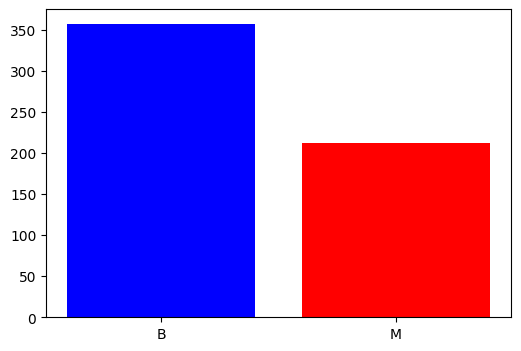

In [ ]:
plt.figure(figsize=(6,4))
plt.bar(df['diagnosis'].value_counts().keys(),df['diagnosis'].value_counts(),color=['blue','red'])
plt.show()

In [ ]:
df.groupby('diagnosis').mean()
#it gives the description of data wrt to B and M for further analysis
#we can see that person in M state have greater mean values than B state for all of the features
#M state is more dangerous than B state

id  radius_mean  texture_mean  perimeter_mean  \
diagnosis                                                            
B          2.654382e+07    12.146524     17.914762       78.075406   
M          3.681805e+07    17.462830     21.604906      115.365377   

            area_mean  smoothness_mean  compactness_mean  concavity_mean  \
diagnosis                                                                  
B          462.790196         0.092478          0.080085        0.046058   
M          978.376415         0.102898          0.145188        0.160775   

           concave points_mean  symmetry_mean  fractal_dimension_mean  \
diagnosis                                                               
B                     0.025717       0.174186                0.062867   
M                     0.087990       0.192909                0.062680   

           radius_se  texture_se  perimeter_se    area_se  smoothness_se  \
diagnosis                                                                  
B           0.284082    1.220380      2.000321  21.135148       0.007196   
M           0.609083    1.210915      4.323929  72.672406       0.006780   

           compactness_se  concavity_se  concave points_se  symmetry_se  \
diagnosis                                                                 
B                0.021438      0.025997           0.009858     0.020584   
M                0.032281      0.041824           0.015060     0.020472   

           fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  \
diagnosis                                                                       
B                      0.003636     13.379801      23.515070        87.005938   
M                      0.004062     21.134811      29.318208       141.370330   

            area_worst  smoothness_worst  compactness_worst  concavity_worst  \
diagnosis                                                                      
B           558.899440          0.124959           0.182673         0.166238   
M          1422.286321          0.144845           0.374824         0.450606   

           concave points_worst  symmetry_worst  fractal_dimension_worst  
diagnosis                                                                 
B                      0.074444        0.270246                 0.079442  
M                      0.182237        0.323468                 0.091530

# Data Cleaning

In [ ]:
#searching for null values in data
#the function sum() to calculate the number of missing values in each column of a DataFrame
df.isnull().sum()
#THERE IS NO NULL VALUE


id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
#removing duplicates
# First by calculating the number of duplicate rows
print ("number of duplicates is : ")
df.duplicated().sum()


number of duplicates is : 


0

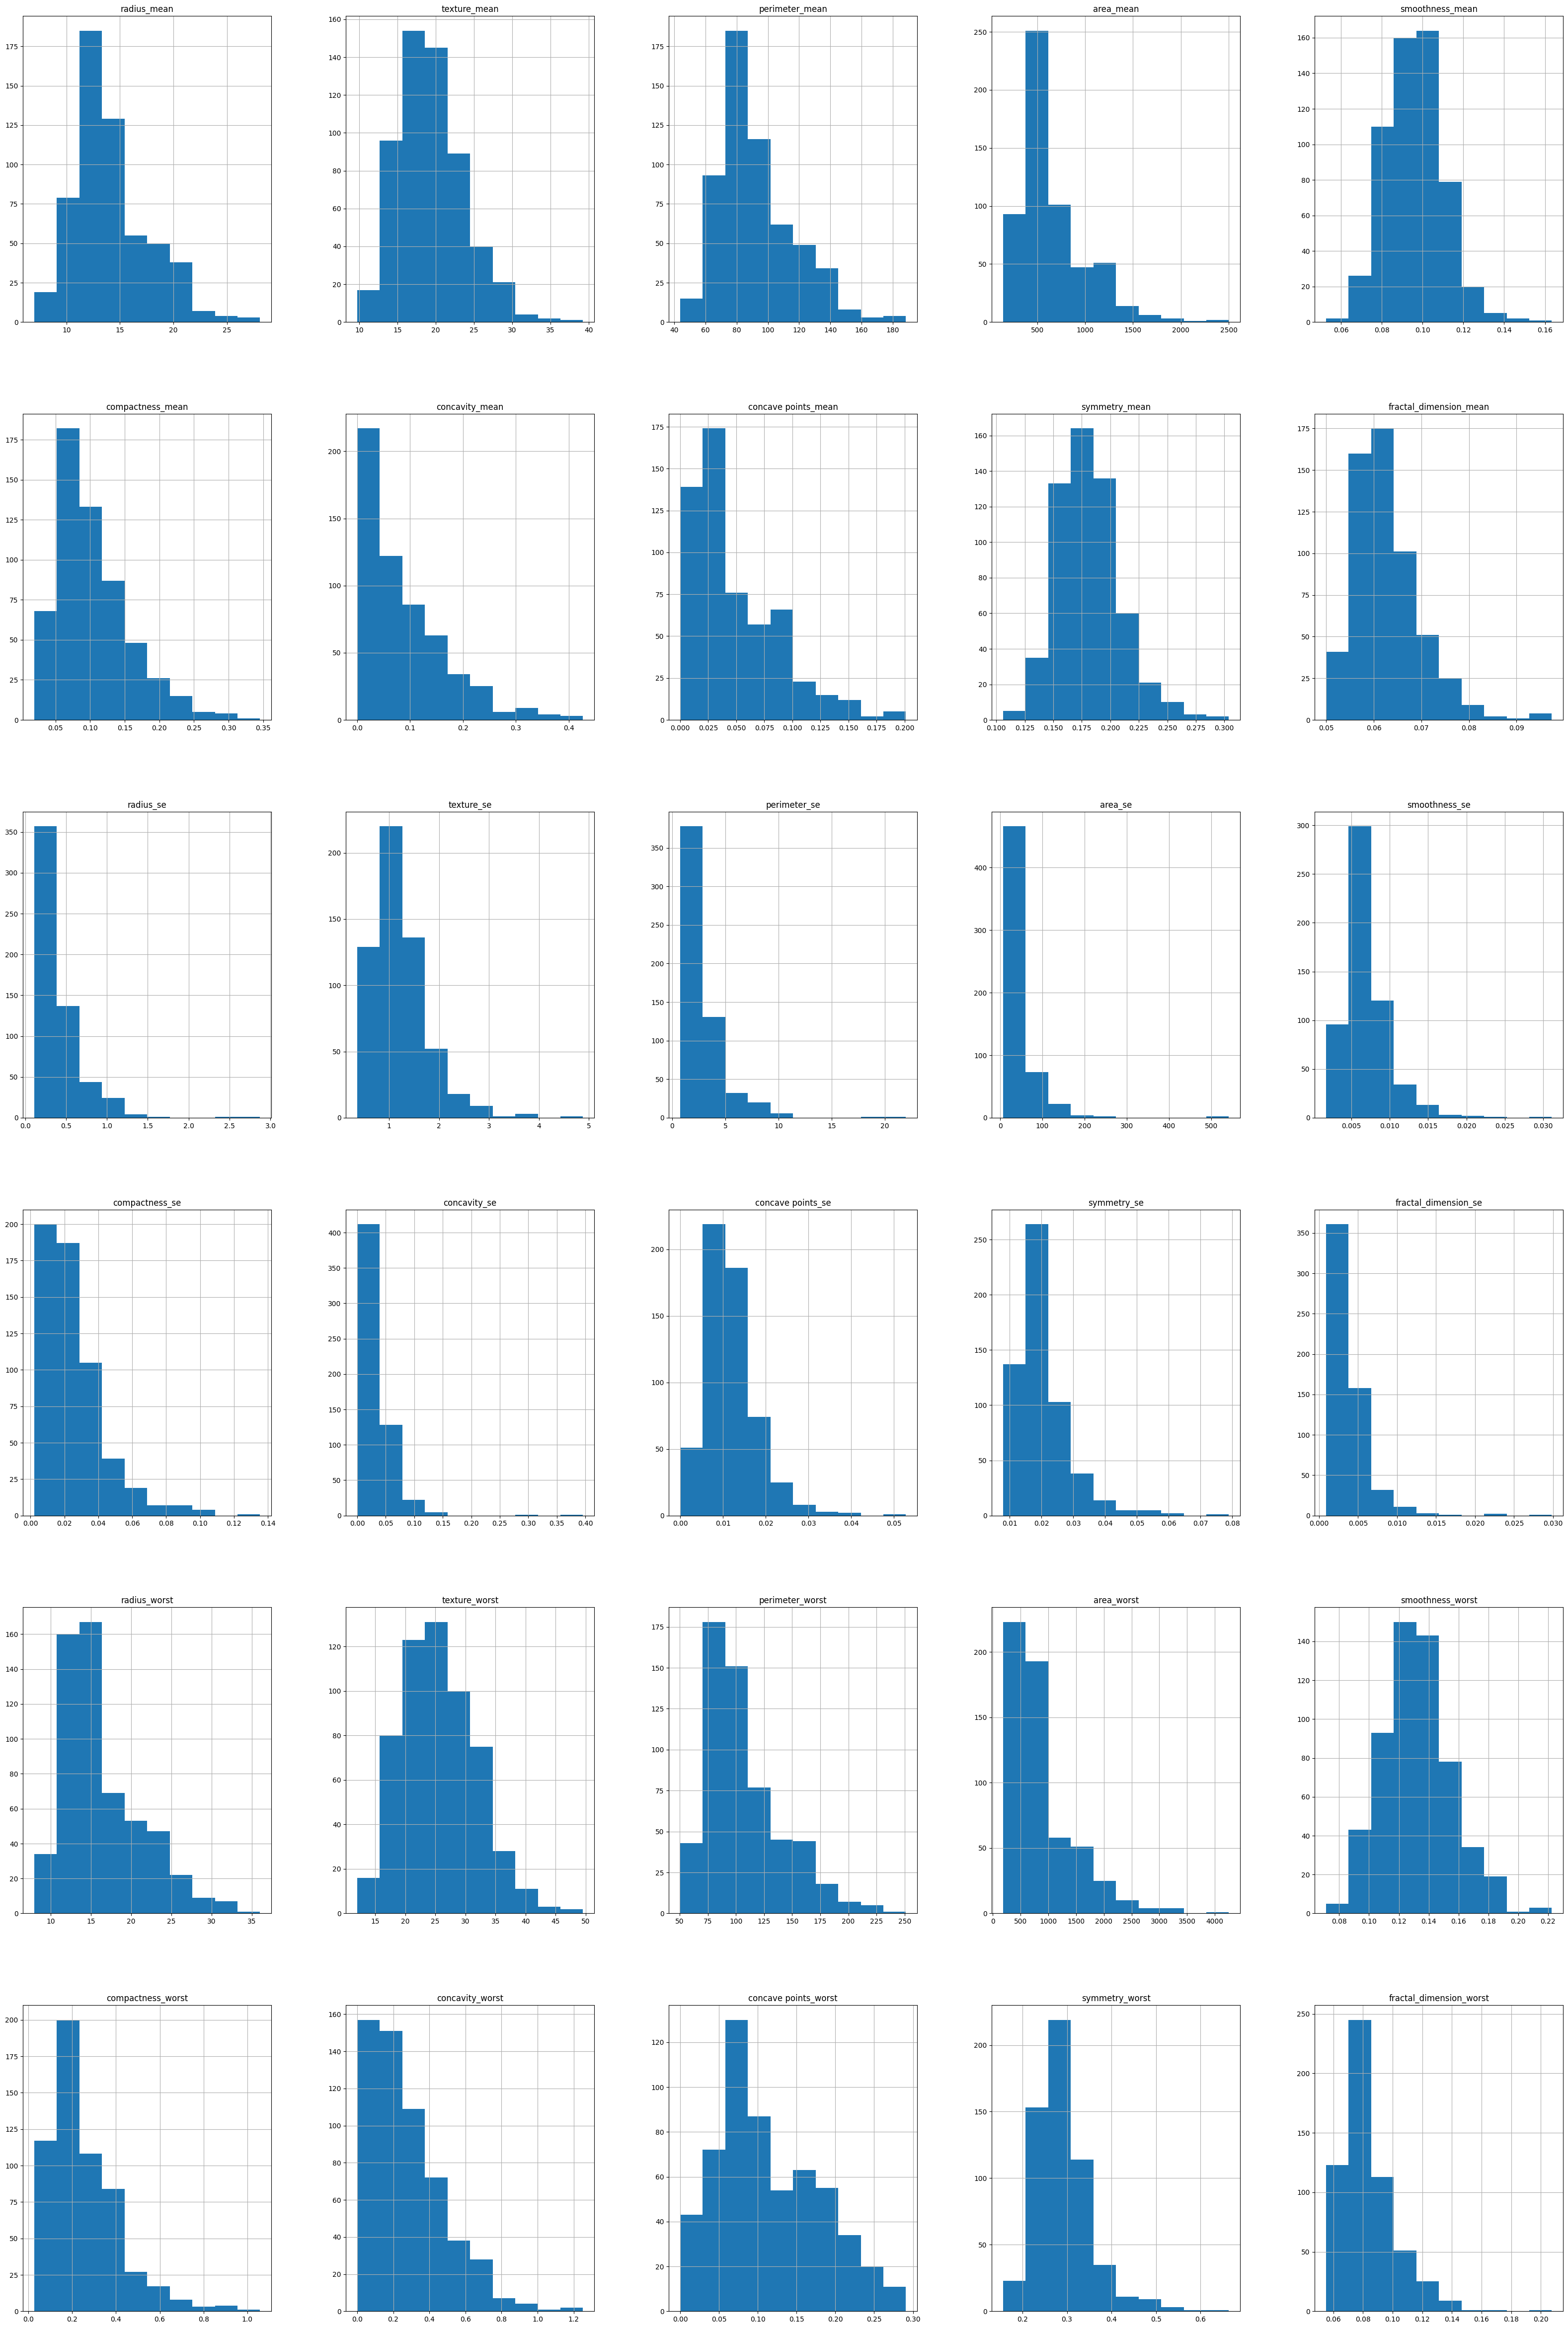

In [ ]:
df.iloc[:,1:].hist(figsize=(40,60))
plt.show()
# after drawing the histogram of each feature it is observed there are outliers

### Encoding the target column

In [ ]:
#the values in the 'diagnosis' column of DataFrame x will be encoded as 1 for 'M' (malignant) and 0 for 'B' (benign).
#to make data processing easier
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df.iloc[:,1]=encoder.fit_transform(df.iloc[:,1].values)

<ipython-input-16-93a4f3623a9a>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,1]=encoder.fit_transform(df.iloc[:,1].values)


In [ ]:
df.iloc[:,1]

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [ ]:
df

id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
0      842302          1        17.99         10.38          122.80   
1      842517          1        20.57         17.77          132.90   
2    84300903          1        19.69         21.25          130.00   
3    84348301          1        11.42         20.38           77.58   
4    84358402          1        20.29         14.34          135.10   
..        ...        ...          ...           ...             ...   
564    926424          1        21.56         22.39          142.00   
565    926682          1        20.13         28.25          131.20   
566    926954          1        16.60         28.08          108.30   
567    927241          1        20.60         29.33          140.10   
568     92751          0         7.76         24.54           47.92   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0       1001.0          0.11840           0.27760         0.30010   
1       1326.0          0.08474           0.07864         0.08690   
2       1203.0          0.10960           0.15990         0.19740   
3        386.1          0.14250           0.28390         0.24140   
4       1297.0          0.10030           0.13280         0.19800   
..         ...              ...               ...             ...   
564     1479.0          0.11100           0.11590         0.24390   
565     1261.0          0.09780           0.10340         0.14400   
566      858.1          0.08455           0.10230         0.09251   
567     1265.0          0.11780           0.27700         0.35140   
568      181.0          0.05263           0.04362         0.00000   

     concave points_mean  symmetry_mean  fractal_dimension_mean  radius_se  \
0                0.14710         0.2419                 0.07871     1.0950   
1                0.07017         0.1812                 0.05667     0.5435   
2                0.12790         0.2069                 0.05999     0.7456   
3                0.10520         0.2597                 0.09744     0.4956   
4                0.10430         0.1809                 0.05883     0.7572   
..                   ...            ...                     ...        ...   
564              0.13890         0.1726                 0.05623     1.1760   
565              0.09791         0.1752                 0.05533     0.7655   
566              0.05302         0.1590                 0.05648     0.4564   
567              0.15200         0.2397                 0.07016     0.7260   
568              0.00000         0.1587                 0.05884     0.3857   

     texture_se  perimeter_se  area_se  smoothness_se  compactness_se  \
0        0.9053         8.589   153.40       0.006399         0.04904   
1        0.7339         3.398    74.08       0.005225         0.01308   
2        0.7869         4.585    94.03       0.006150         0.04006   
3        1.1560         3.445    27.23       0.009110         0.07458   
4        0.7813         5.438    94.44       0.011490         0.02461   
..          ...           ...      ...            ...             ...   
564      1.2560         7.673   158.70       0.010300         0.02891   
565      2.4630         5.203    99.04       0.005769         0.02423   
566      1.0750         3.425    48.55       0.005903         0.03731   
567      1.5950         5.772    86.22       0.006522         0.06158   
568      1.4280         2.548    19.15       0.007189         0.00466   

     concavity_se  concave points_se  symmetry_se  fractal_dimension_se  \
0         0.05373            0.01587      0.03003              0.006193   
1         0.01860            0.01340      0.01389              0.003532   
2         0.03832            0.02058      0.02250              0.004571   
3         0.05661            0.01867      0.05963              0.009208   
4         0.05688            0.01885      0.01756              0.005115   
..            ...                ...          ...                

### Dropping unnecessary features

In [ ]:
#Dropping the id column
#Irrelevant or Uninformative Feature
#This column do not contribute to the understanding or prediction of the target variable
drop_cols=['id']
df_new=df.drop(drop_cols,axis=1)
df_new


diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            1        17.99         10.38          122.80     1001.0   
1            1        20.57         17.77          132.90     1326.0   
2            1        19.69         21.25          130.00     1203.0   
3            1        11.42         20.38           77.58      386.1   
4            1        20.29         14.34          135.10     1297.0   
..         ...          ...           ...             ...        ...   
564          1        21.56         22.39          142.00     1479.0   
565          1        20.13         28.25          131.20     1261.0   
566          1        16.60         28.08          108.30      858.1   
567          1        20.60         29.33          140.10     1265.0   
568          0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
0           0.2419                 0.07871     1.0950      0.9053   
1           0.1812                 0.05667     0.5435      0.7339   
2           0.2069                 0.05999     0.7456      0.7869   
3           0.2597                 0.09744     0.4956      1.1560   
4           0.1809                 0.05883     0.7572      0.7813   
..             ...                     ...        ...         ...   
564         0.1726                 0.05623     1.1760      1.2560   
565         0.1752                 0.05533     0.7655      2.4630   
566         0.1590                 0.05648     0.4564      1.0750   
567         0.2397                 0.07016     0.7260      1.5950   
568         0.1587                 0.05884     0.3857      1.4280   

     perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  \
0           8.589   153.40       0.006399         0.04904       0.05373   
1           3.398    74.08       0.005225         0.01308       0.01860   
2           4.585    94.03       0.006150         0.04006       0.03832   
3           3.445    27.23       0.009110         0.07458       0.05661   
4           5.438    94.44       0.011490         0.02461       0.05688   
..            ...      ...            ...             ...           ...   
564         7.673   158.70       0.010300         0.02891       0.05198   
565         5.203    99.04       0.005769         0.02423       0.03950   
566         3.425    48.55       0.005903         0.03731       0.04730   
567         5.772    86.22       0.006522         0.06158       0.07117   
568         2.548    19.15       0.007189         0.00466       0.00000   

     concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
0              0.01587      0.03003              0.006193        25.380   
1              0.01340      0.01389              0.003532        24.990   
2              0.02058      0.02250              0.004571        23.570   
3              0.01867      0.05963              0.009208        14.910   
4              0.01885      0.01756              0.005115        22.540   
..         

### **Outliers Removal**  

In [ ]:
#
feature_list_2 = feature_list[1:]

In [ ]:
def remove_outlier(df_in, col):
    # calculating 1st quartile (25%)
    q1 = df_in[col].quantile(0.25)

    # calculating 2st quartile (75%)
    q3 = df_in[col].quantile(0.75)

    # Interquartile range
    iqr = q3 - q1
    # the lower bounds.
    fence_low = q1 - 1.5 * iqr

    # the upper bounds.
    fence_high = q3 + 1.5 * iqr

    #filter out the rows from the DataFrame df_in that contain outlier values
    df_out = df_in.loc[~((df_in[col] < fence_low) | (df_in[col] > fence_high)).any(axis=1)]

    #returns a cleaned DataFrame without outliers
    return df_out

#passing df_new and feature_list_2 as parameters to remove any outlier
df_out = remove_outlier(df_new, feature_list_2)
df_out.shape

(398, 31)

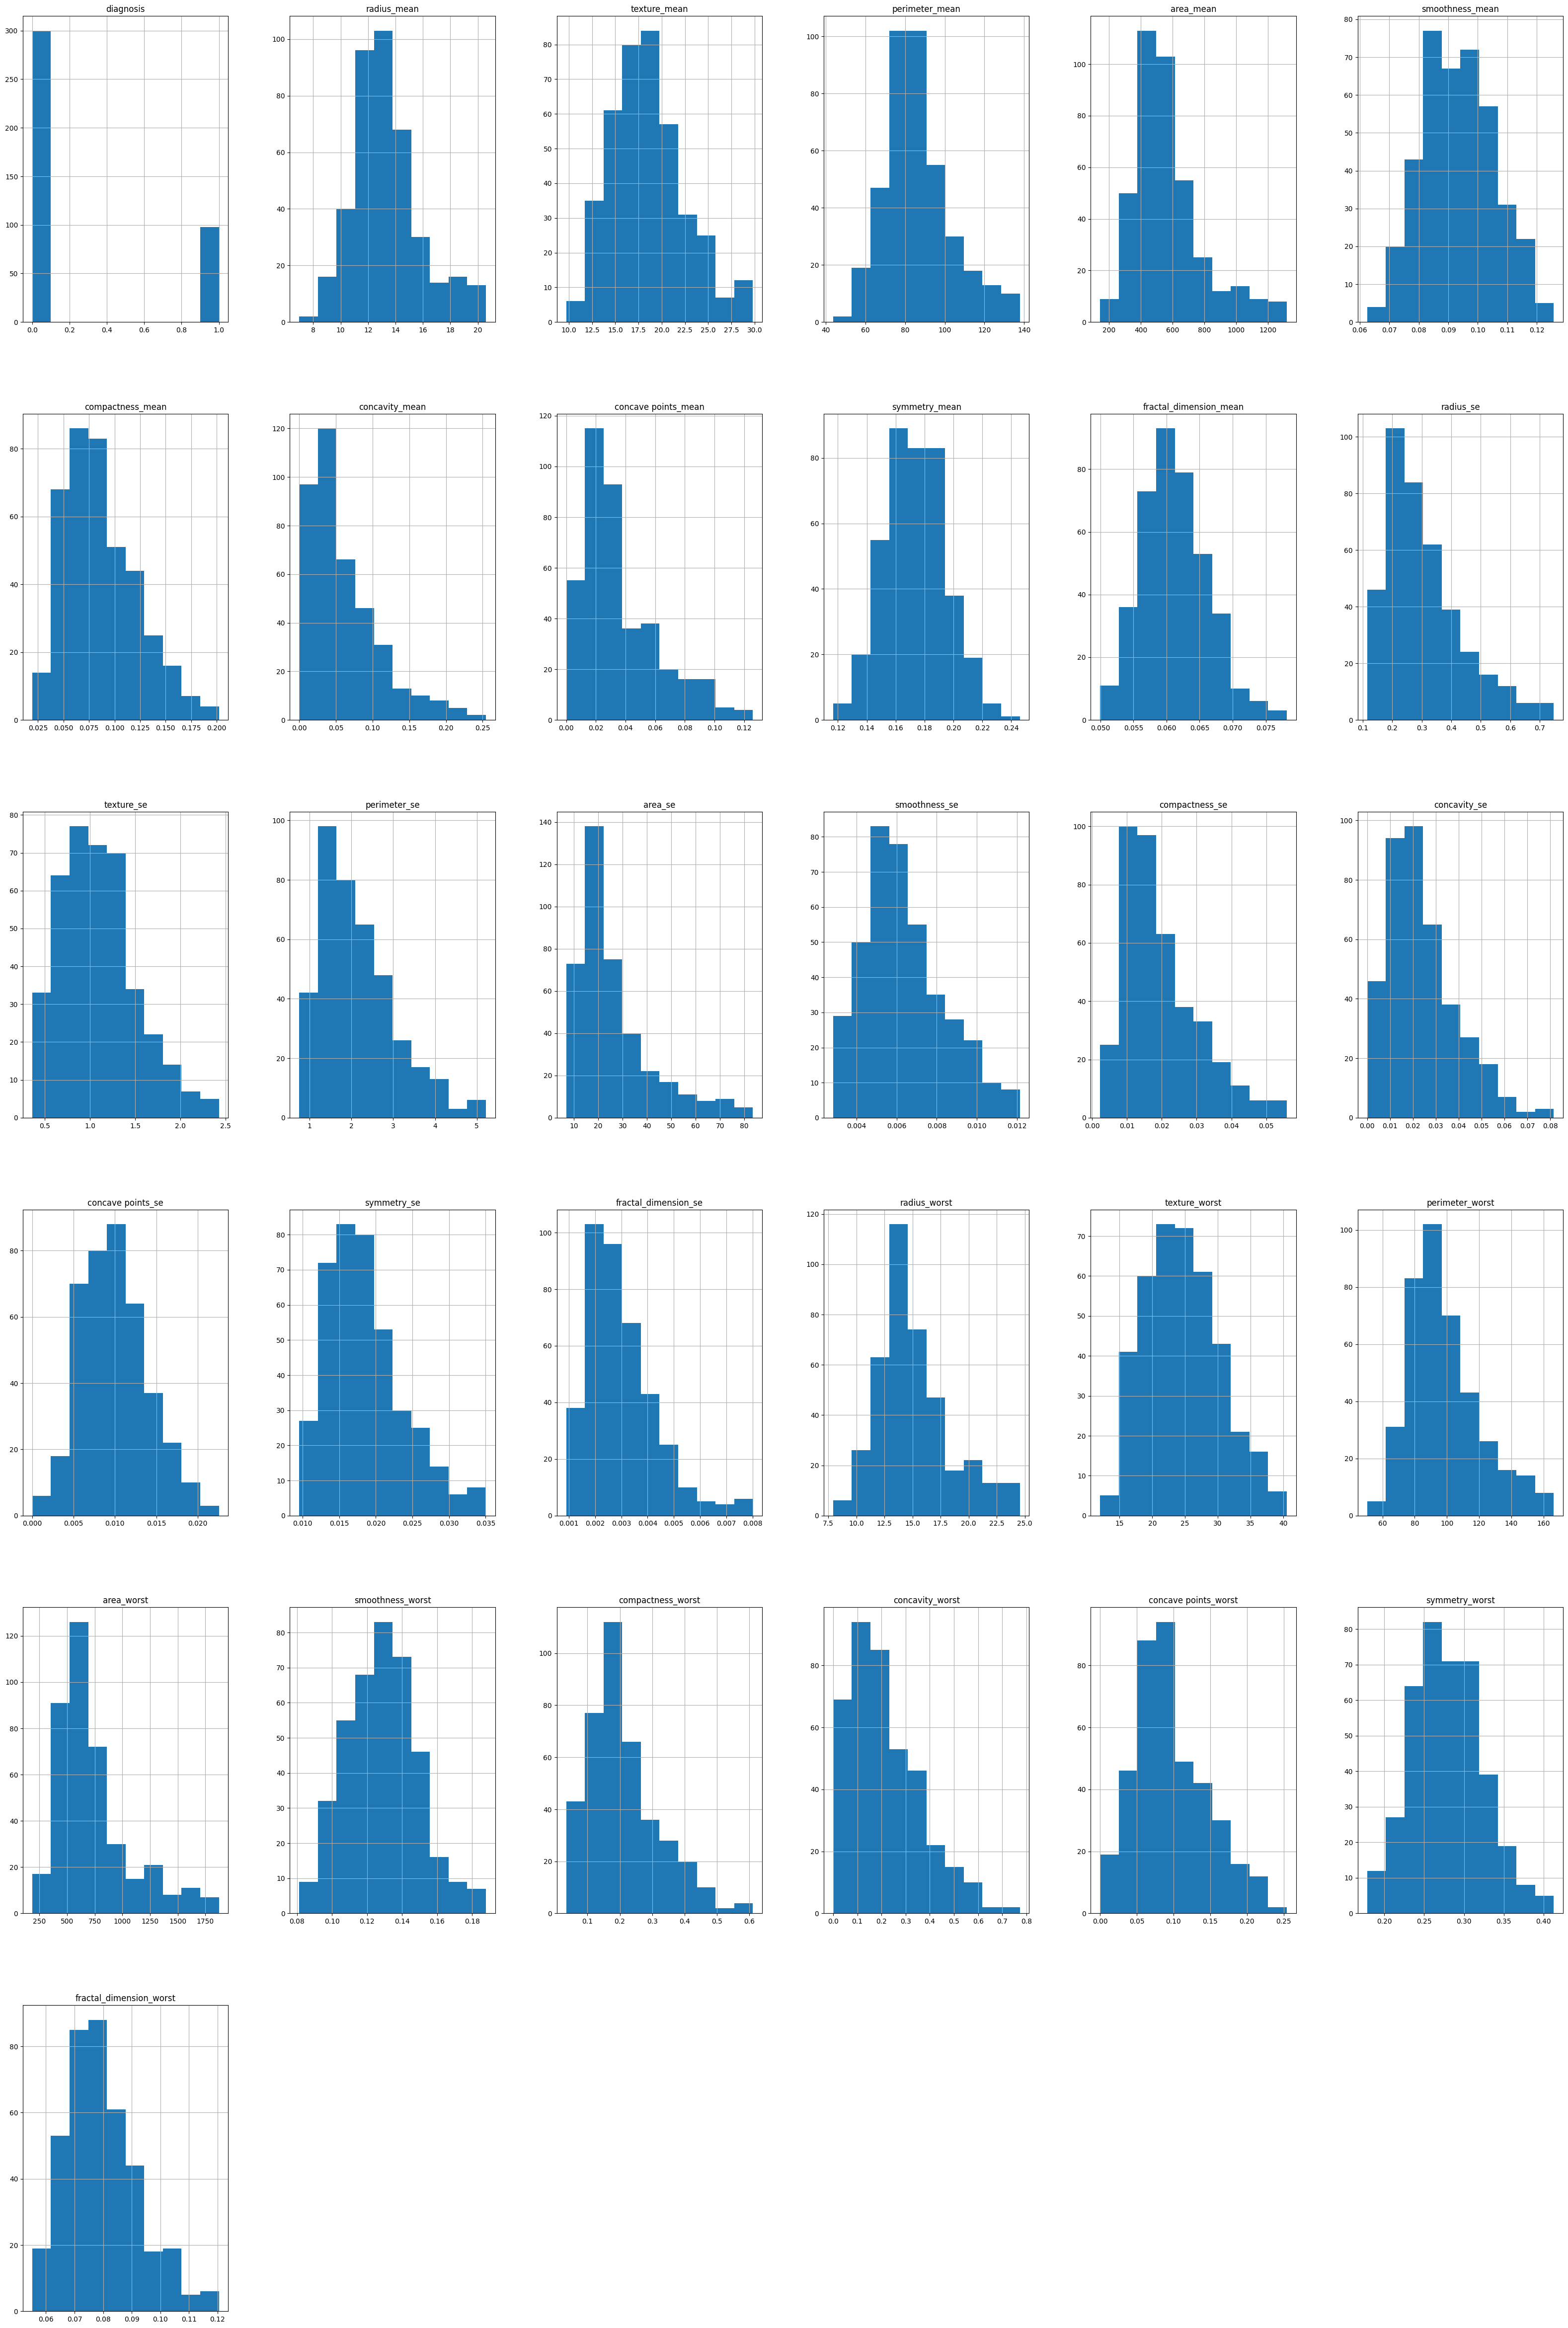

In [ ]:
# visualizaton of the feature after removal of the outliers
df_out.hist(figsize=(40,60))
plt.show()

### Descriptive Statistics

In [ ]:
#mean , standard division
df_out.iloc[:,1:].describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   398.000000    398.000000      398.000000   398.000000   
mean     13.376209     18.505879       86.403266   570.547990   
std       2.484104      3.911148       16.841597   222.883241   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.710000     15.702500       75.065000   420.350000   
50%      12.995000     18.175000       84.065000   518.300000   
75%      14.640000     20.755000       94.730000   664.200000   
max      20.590000     29.810000      137.800000  1320.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       398.000000        398.000000      398.000000           398.000000   
mean          0.093271          0.086260        0.060442             0.035902   
std           0.012066          0.034979        0.049068             0.025625   
min           0.062510          0.019380        0.000000             0.000000   
25%           0.084520          0.059592        0.025628             0.018640   
50%           0.092385          0.079455        0.045580             0.028295   
75%           0.101750          0.108975        0.083572             0.049478   
max           0.125700          0.202200        0.254500             0.125900   

       symmetry_mean  fractal_dimension_mean   radius_se  texture_se  \
count     398.000000              398.000000  398.000000  398.000000   
mean        0.173639                0.061211    0.306608    1.092313   
std         0.020819                0.005015    0.127897    0.416156   
min         0.116700                0.049960    0.114400    0.360200   
25%         0.159000                0.057337    0.214225    0.782600   
50%         0.172250                0.060855    0.273450    1.032000   
75%         0.188500                0.064213    0.371075    1.350000   
max         0.245900                0.078180    0.747400    2.426000   

       perimeter_se     area_se  smoothness_se  compactness_se  concavity_se  \
count    398.000000  398.000000     398.000000      398.000000    398.000000   
mean       2.153439   26.512990       0.006390        0.019689      0.024014   
std        0.892941   15.553495       0.001995        0.010626      0.015108   
min        0.757000    6.802000       0.002826        0.002252      0.000000   
25%        1.491500   16.365000       0.004961        0.011800      0.013415   
50%        1.970000   21.195000       0.006002        0.017035      0.020610   
75%        2.594000   31.307500       0.007507        0.025057      0.031753   
max        5.216000   83.500000       0.012150        0.055920      0.081580   

       concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
count         398.000000   398.000000            398.000000    398.000000   
mean            0.009910     0.018632              0.002998     15.087623   
std             0.004037     0.005270              0.001306      3.232713   
min             0.000000     0.009539              0.000895      7.930000   
25%             0.006882     0.014650              0.002035     13.015000   
50%             0.009408     0.017920              0.002730     14.395000   
75%             0.012600     0.021490              0.003691     16.457500   
max             0.022580     0.035040              0.008015     24.560000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     398.000000       398.000000   398.000000        398.000000   
mean       24.723015        98.640477   728.471608          0.128684   
std         5.635779        22.129399   329.649485          0.020253   
min        12.020000        50.410000   185.200000          0.081250   
25%        20.385000        83.922500   516.025000          0.113900   
50%        24.585000        93.905000   632.500000          0.128900   
75%        28.435000       109.775000   830.575000          0.141775   
max        40.540000       166.400000  1872.000000 

In [ ]:
# median values for all featuers
median_values = df_out.iloc[:, 1:].median()
median_values

radius_mean                 12.995000
texture_mean                18.175000
perimeter_mean              84.065000
area_mean                  518.300000
smoothness_mean              0.092385
compactness_mean             0.079455
concavity_mean               0.045580
concave points_mean          0.028295
symmetry_mean                0.172250
fractal_dimension_mean       0.060855
radius_se                    0.273450
texture_se                   1.032000
perimeter_se                 1.970000
area_se                     21.195000
smoothness_se                0.006002
compactness_se               0.017035
concavity_se                 0.020610
concave points_se            0.009408
symmetry_se                  0.017920
fractal_dimension_se         0.002730
radius_worst                14.395000
texture_worst               24.585000
perimeter_worst             93.905000
area_worst                 632.500000
smoothness_worst             0.128900
compactness_worst            0.188300
concavity_wo

In [ ]:
#mode values for all featuers
mode_values = df_out.iloc[:, 1:].mode().iloc[0]
mode_values

radius_mean                 12.340000
texture_mean                14.930000
perimeter_mean              82.610000
area_mean                  512.200000
smoothness_mean              0.100700
compactness_mean             0.114700
concavity_mean               0.000000
concave points_mean          0.000000
symmetry_mean                0.146700
fractal_dimension_mean       0.059070
radius_se                    0.220400
texture_se                   1.150000
perimeter_se                 1.778000
area_se                     16.640000
smoothness_se                0.005080
compactness_se               0.018120
concavity_se                 0.000000
concave points_se            0.000000
symmetry_se                  0.013440
fractal_dimension_se         0.001784
radius_worst                12.360000
texture_worst               17.700000
perimeter_worst            105.900000
area_worst                 458.000000
smoothness_worst             0.122300
compactness_worst            0.148600
concavity_wo

In [ ]:
# variance values for all featuers
variance_values = df_out.iloc[:, 1:].var()
variance_values

radius_mean                     6.170772
texture_mean                   15.297079
perimeter_mean                283.639389
area_mean                   49676.939177
smoothness_mean                 0.000146
compactness_mean                0.001224
concavity_mean                  0.002408
concave points_mean             0.000657
symmetry_mean                   0.000433
fractal_dimension_mean          0.000025
radius_se                       0.016358
texture_se                      0.173186
perimeter_se                    0.797343
area_se                       241.911218
smoothness_se                   0.000004
compactness_se                  0.000113
concavity_se                    0.000228
concave points_se               0.000016
symmetry_se                     0.000028
fractal_dimension_se            0.000002
radius_worst                   10.450436
texture_worst                  31.761999
perimeter_worst               489.710296
area_worst                 108668.782744
smoothness_worst

### Correlation coefficient Calculation

In [ ]:
#to calculate the correlation matrix for a subset of columns"from 0 to 13" in the DataFrame x
df_out.iloc[:,:].corr()

diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis                 1.000000     0.680705      0.388596        0.695835   
radius_mean               0.680705     1.000000      0.280796        0.998113   
texture_mean              0.388596     0.280796      1.000000        0.285880   
perimeter_mean            0.695835     0.998113      0.285880        1.000000   
area_mean                 0.698005     0.992047      0.288688        0.990235   
smoothness_mean           0.271570     0.055311     -0.046879        0.093196   
compactness_mean          0.514346     0.442360      0.181078        0.492915   
concavity_mean            0.710567     0.658031      0.295111        0.696240   
concave points_mean       0.752190     0.755607      0.239147        0.785954   
symmetry_mean             0.243588     0.075653      0.051037        0.102371   
fractal_dimension_mean   -0.086631    -0.436397     -0.110214       -0.393736   
radius_se                 0.571842     0.534801      0.290195        0.542837   
texture_se                0.007755    -0.149935      0.474188       -0.144895   
perimeter_se              0.565909     0.530347      0.294101        0.546622   
area_se                   0.703715     0.758127      0.325637        0.763671   
smoothness_se            -0.036030    -0.301325      0.089100       -0.283129   
compactness_se            0.229104     0.165214      0.212798        0.207785   
concavity_se              0.325974     0.265486      0.242464        0.302232   
concave points_se         0.387972     0.363046      0.198599        0.394612   
symmetry_se              -0.194890    -0.327179      0.011039       -0.318263   
fractal_dimension_se      0.062799    -0.100183      0.095912       -0.063267   
radius_worst              0.761081     0.971286      0.311152        0.972912   
texture_worst             0.437909     0.273847      0.914721        0.280552   
perimeter_worst           0.768194     0.964851      0.316562        0.971558   
area_worst                0.773626     0.957772      0.317755        0.959710   
smoothness_worst          0.396847     0.087209      0.069886        0.121237   
compactness_worst         0.533996     0.416464      0.216026        0.460901   
concavity_worst           0.653300     0.563240      0.274070        0.599672   
concave points_worst      0.726639     0.682235      0.238186        0.712906   
symmetry_worst            0.347406     0.137655      0.076977        0.160178   
fractal_dimension_worst   0.290821    -0.014583      0.060915        0.027877   

                         area_mean  smoothness_mean  compactness_mean  \
diagnosis                 0.698005         0.271570          0.514346   
radius_mean               0.992047         0.055311          0.442360   
texture_mean              0.288688        -0.046879          0.181078   
perimeter_mean            0.990235         0.093196          0.492915   
area_mean                 1.000000         0.058280          0.428703   
smoothness_mean           0.058280         1.000000          0.675183   
compactness_mean          0.428703         0.675183          1.000000   
concavity_mean            0.664847         0.463982          0.837473   
concave points_mean       0.758145         0.522678          0.805062   
symmetry_mean             0.077918         0.494062          0.470457   
fractal_dimension_mean   -0.423006         0.614693          0.478338   
radius_se                 0.561732         0.224720          0.384081   
texture_se               -0.132103         0.056968         -0.007041   
perimeter_se              0.554631         0.213312          0.467098   
area_se                   0.786897         0.181729          0.431306   
smoothness_se            -0.260649         0.330804          0.115057   
compactness_se            0.161122         0.240507          0.696339   
concavity_se              0.268137         0.230219          0.637905   
concave points_se         0.354173         0.

<Axes: >

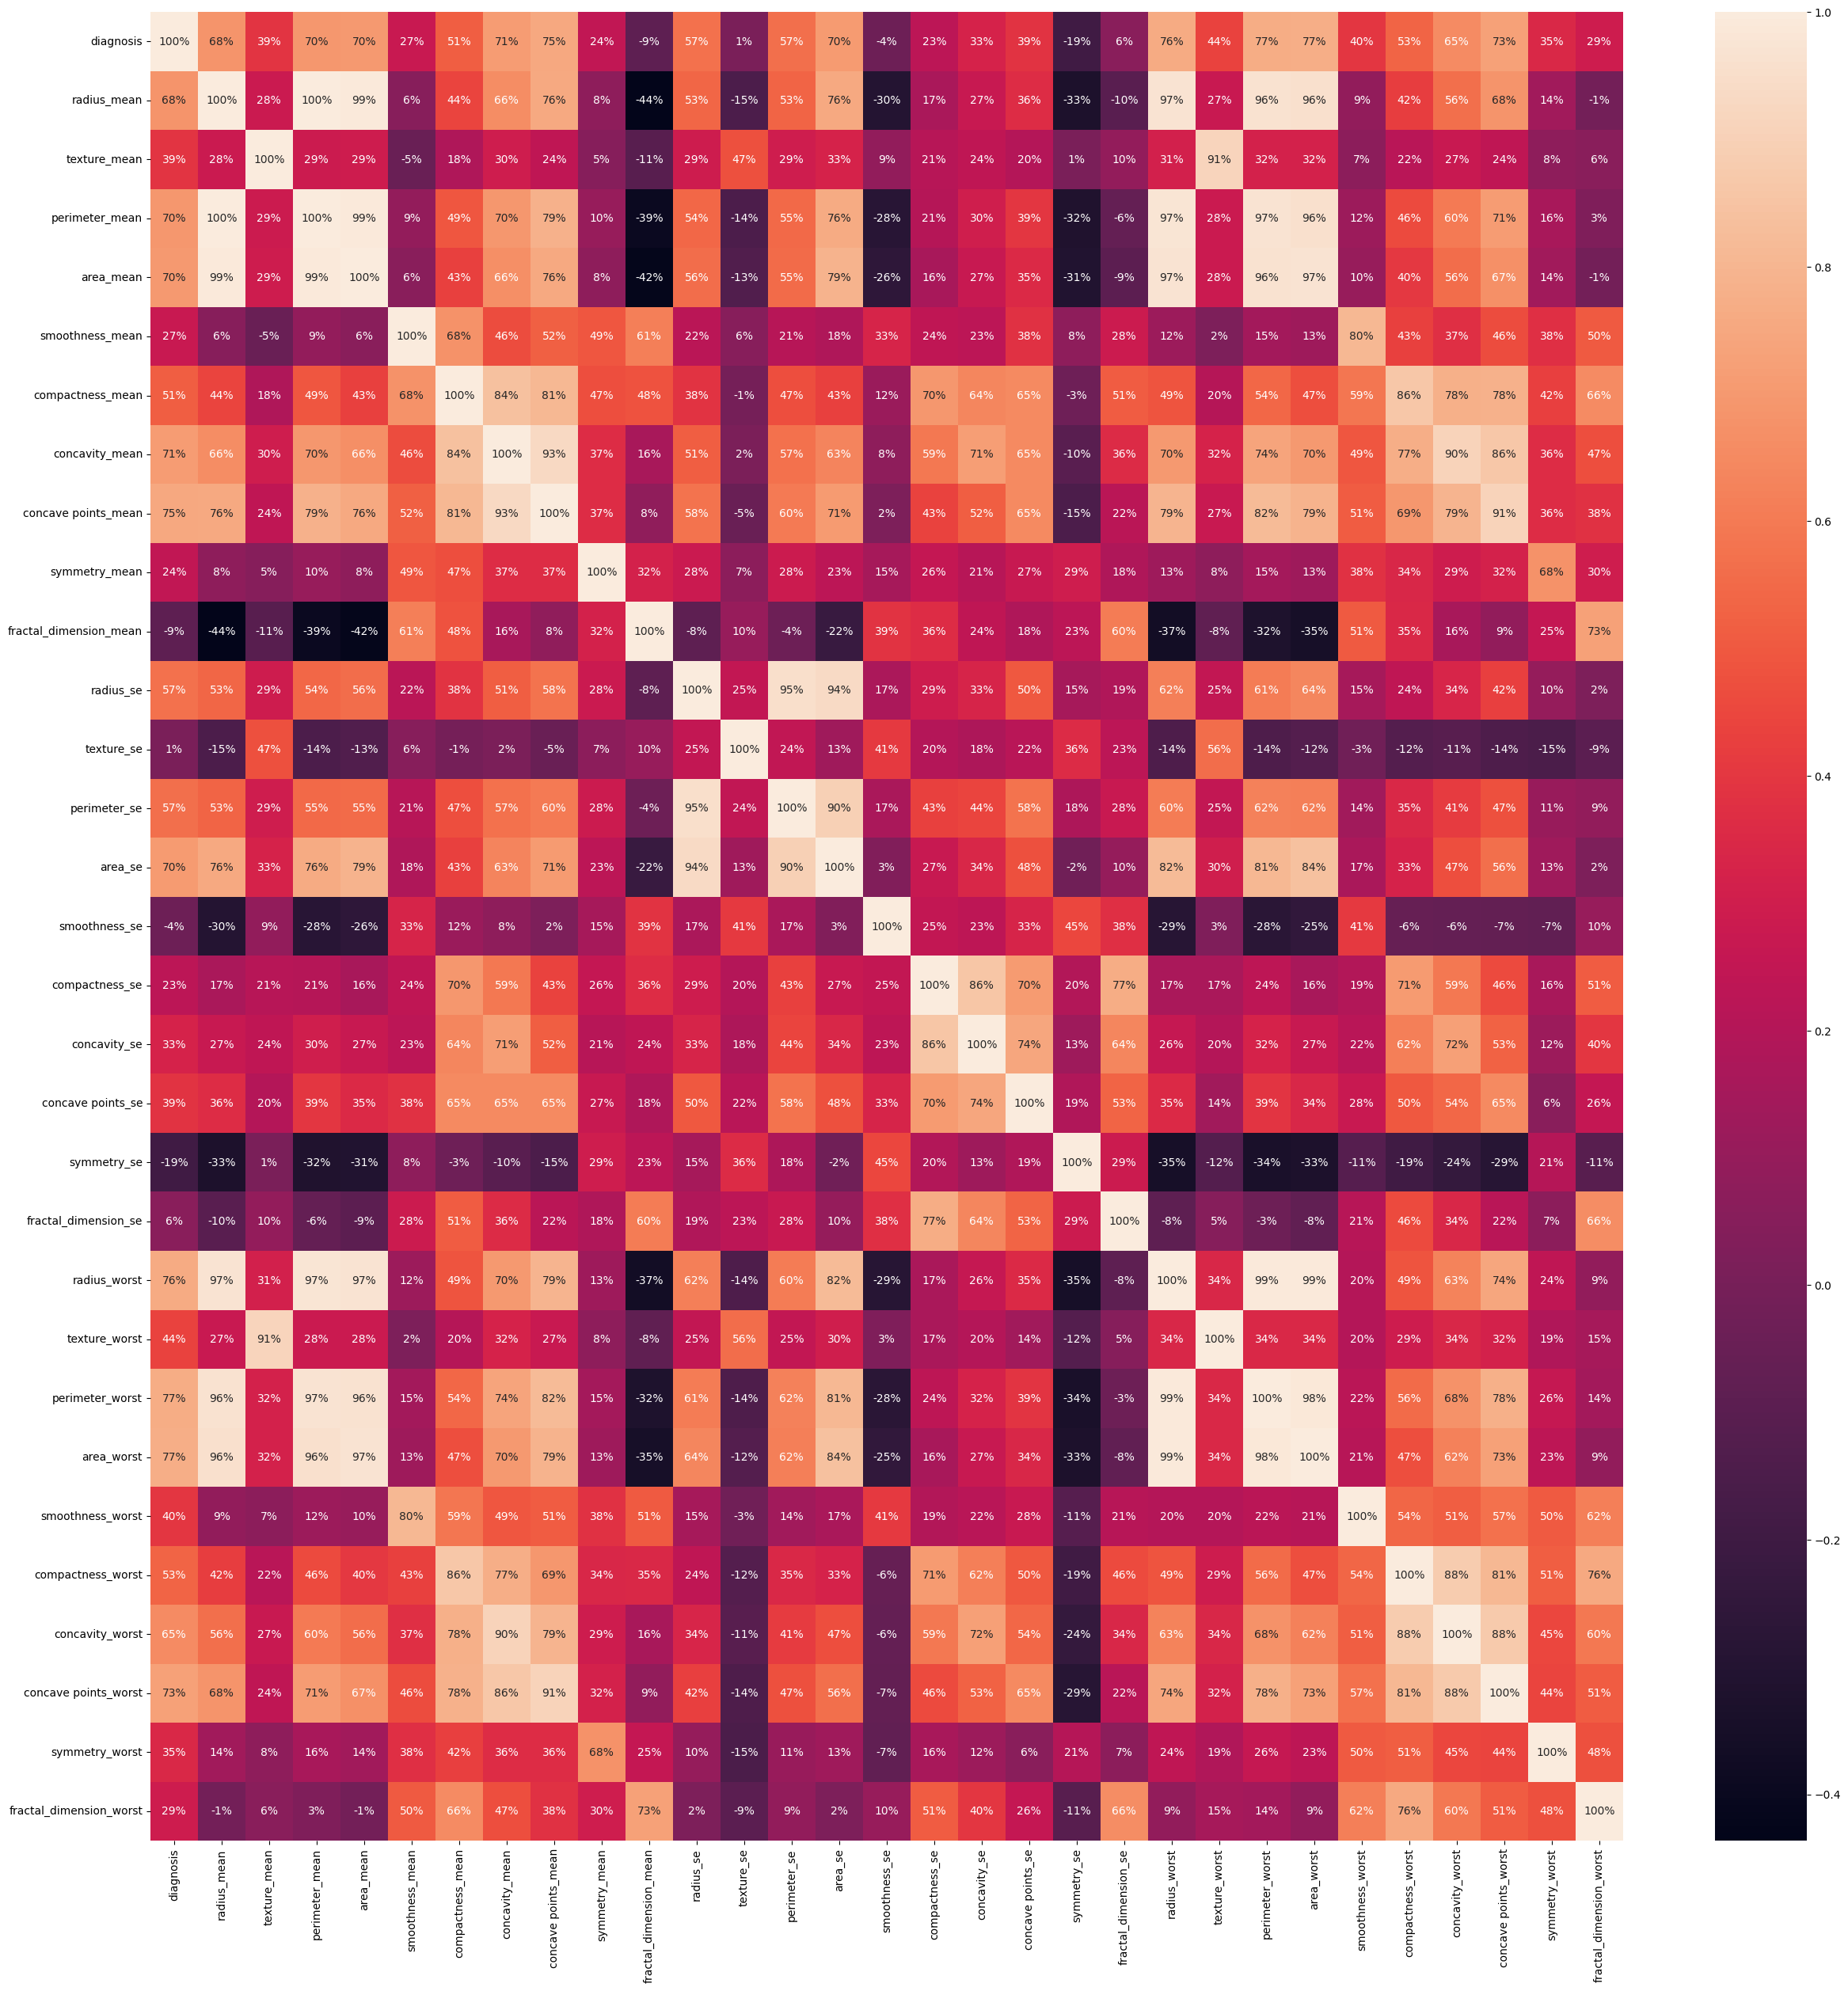

In [ ]:
plt.figure(figsize=(30,30))
sns.heatmap(df_out.iloc[:,:].corr(),annot=True,fmt='.0%')

In [ ]:
df_clas=df_out.copy()

# Standardization

In [ ]:
#Standardization
def standardization(df,column):
    # calculating z score for each feature
    z_score=(df_out[column]-df_out[column].mean())/df_out[column].std()
    return z_score

# iterationg over the dataset to callculate the z score
for column in df_out.columns[1:]:
    df_out[column]=standardization(df_out,column)
df_out

<ipython-input-30-c25dd6fb731c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out[column]=standardization(df_out,column)


diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
6            1     1.961992      0.376902        1.971116   2.106269   
7            1     0.134371      0.594230        0.225438   0.032986   
10           1     1.064284      1.210417        0.967648   1.019601   
11           1     0.967669     -0.157468        1.021087   0.944225   
13           1     0.995849      1.391950        1.027025   0.951853   
..         ...          ...           ...             ...        ...   
554          0    -0.199754      2.662676       -0.231763  -0.252365   
555          0    -1.242383      2.327736       -1.231075  -1.117841   
558          0     0.488623      1.067237        0.592980   0.388329   
560          0     0.271241      2.210124        0.295502   0.133936   
566          1     1.297768      2.447905        1.300158   1.290146   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
6           0.112610          0.650097        1.065016             1.486767   
7           2.124016          2.236750        0.676980             0.934563   
10         -0.929145         -0.559476       -0.559476            -0.104283   
11          0.317314          1.227582        0.796815             1.176908   
13         -0.767536          0.398519        0.793554             0.692217   
..               ...               ...             ...                  ...   
554        -0.997932         -0.801048        0.030729            -0.486729   
555        -0.246244         -0.276737       -0.009216            -0.332580   
558        -0.707865          1.336217        0.865291             0.056890   
560         0.498813          0.753015       -0.322457             0.278552   
566        -0.722783          0.458555        0.653543             0.668022   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
6         0.276705               -0.755837   1.095348   -0.766812   
7         2.207608                2.651845   2.164955    0.684087   
10       -1.000957               -0.845566   0.569927    0.227527   
11        0.507261               -0.077890   1.557437   -0.258108   
13        0.531277               -1.561398   0.756013   -0.034394   
..             ...                     ...        ...         ...   
554      -0.818434               -0.823632  -0.742843    0.643237   
555      -0.688746                0.011839  -0.677948    2.755426   
558      -1.356396                0.051718  -0.634944    0.037694   
560      -0.957727                0.099573   0.452645    0.960425   
566      -0.703156               -0.943270   1.171190   -0.041603   

     perimeter_se   area_se  smoothness_se  compactness_se  concavity_se  \
6        1.149641  1.761470      -1.040179       -0.552309     -0.097578   
7        1.906690  1.571802       1.210397        0.997708      0.057302   
10       0.350036  0.899927      -1.183001       -0.980610     -0.860727   
11       1.579680  1.777543      -0.310032        1.968939      0.257852   
13       0.839430  0.647251       1.693487        1.088996      1.753703   
..            ...       ...            ...             ...           ...   
554     -0.729543 -0.622560       1.013453        0.173291      0.990554   
555     -0.802336 -0.774938       2.836565        0.721961      1.590218   
558      0.079021 -0.448323      -1.076261        2.512903      2.764395   
560      0.822631  0.213908       0.434146        0.667377     -0.218703   
566      1.424015  1.416853      -0.243883        1.658371      1.541239   

     concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
6             0.118818    -0.937670             -0.626732      2.410476   
7             1.131877    -0.715677              1.848061      0.610130   
10           -0.574471    -0.765009              0.033877      1.269020   
11            0.720709     0.274753              0.877434      1.649505   
13            2.479319     2.120899              0.003258      0.542076   

# Splitting the dataset into training and validation

In [ ]:
#Splitting the dataset into training and validation
from sklearn.model_selection import train_test_split
y=df_out['diagnosis']
x=df_out.drop('diagnosis',axis=1)

x_train , x_valid , y_train , y_valid = train_test_split(x,y,test_size=0.2,random_state=42)
print("x_train_shape",x_train.shape)
print("x_valid_shape",x_valid.shape)
print("y_train_shape",y_train.shape)
print("y_valid_shape",y_valid.shape)
y

x_train_shape (318, 30)
x_valid_shape (80, 30)
y_train_shape (318,)
y_valid_shape (80,)


6      1
7      1
10     1
11     1
13     1
      ..
554    0
555    0
558    0
560    0
566    1
Name: diagnosis, Length: 398, dtype: int64

# Histogram Plots

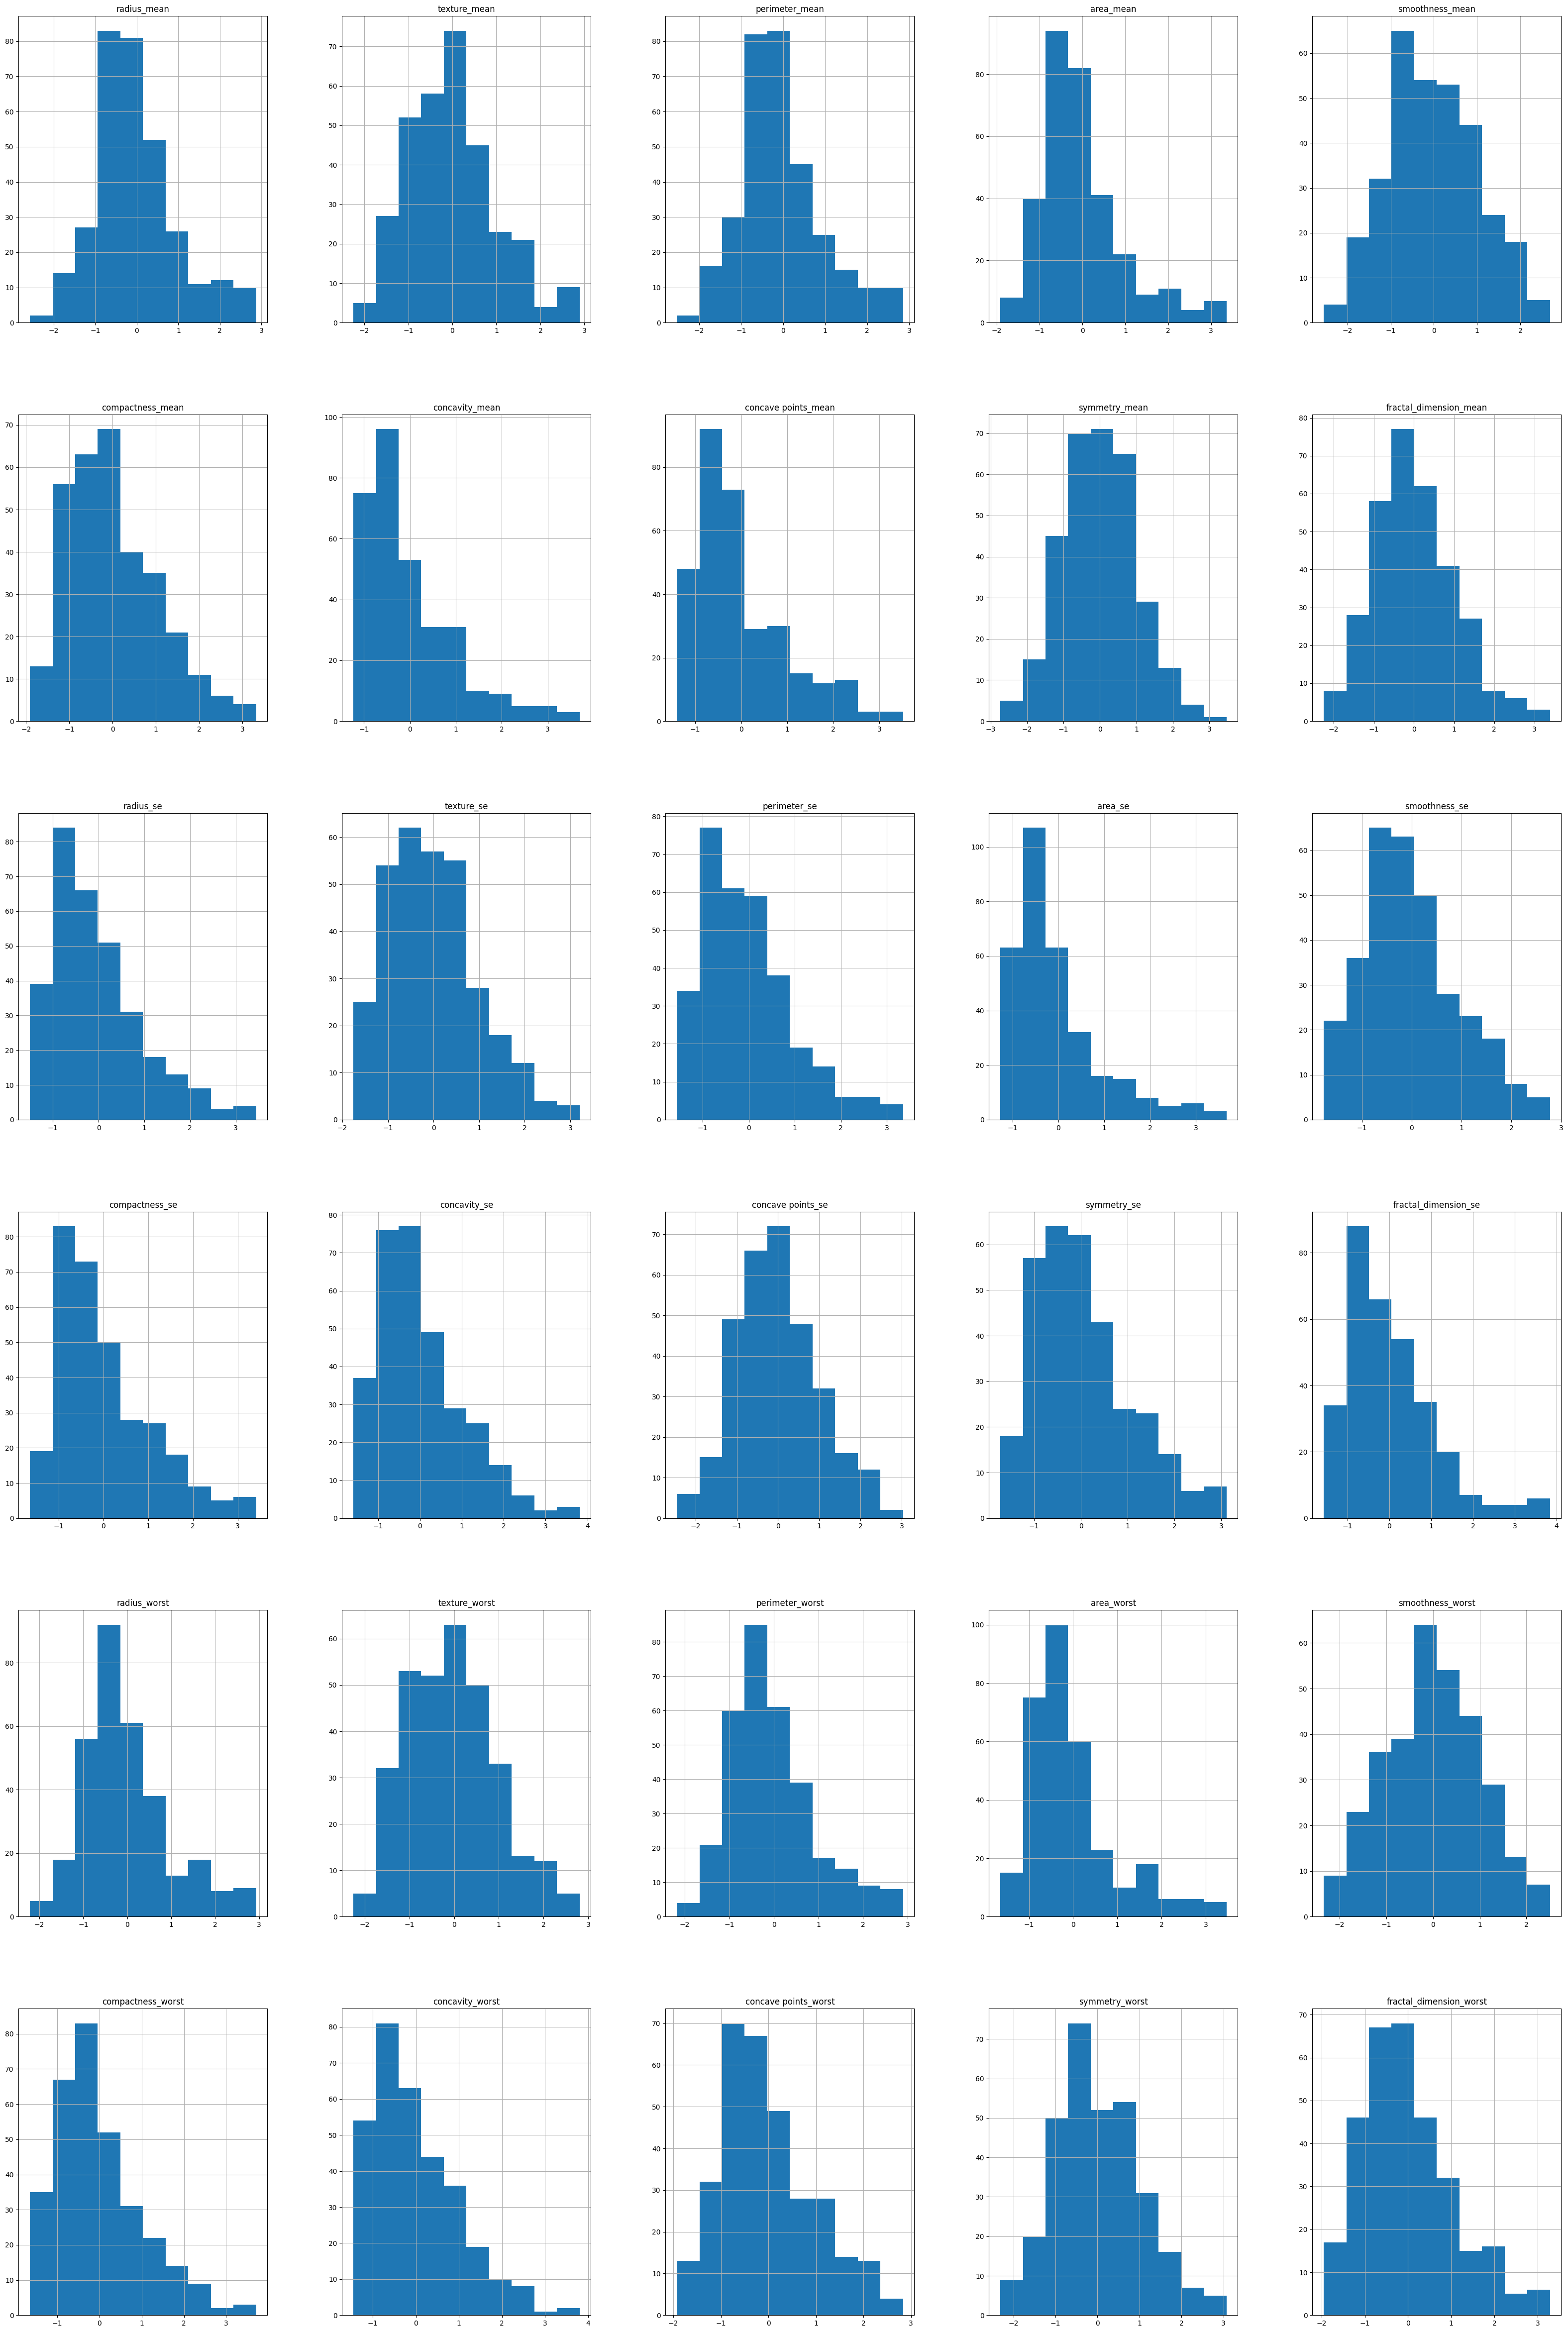

In [ ]:
#plotting each feature after standardization
x_train.hist(figsize=(40,60))
plt.show()

## Comment on the type of each distribution
radius_mean                 normal(gaussian)<br>   
texture_mean                normal(gaussian)<br>
perimeter_mean              normal(gaussian)<br>
area_mean                   normal(gaussian)<br>
smoothness_mean               Gaussian<br>
compactness_mean               Gamma<br>
concavity_mean                 Gamma<br>
concave points_mean            Gamma<br>
symmetry_mean                 Gaussian<br>
fractal_dimension_mean        Gaussian<br>
radius_se                      Gamma<br>
texture_se                     Gamma<br>
perimeter_se                   Gamma<br>
area_se                        Gamma<br>
smoothness_se                  Gamma<br>
compactness_se                 Gamma<br>
concavity_se                   Gamma<br>
concave points_se              Gamma<br>
symmetry_se                    Gamma<br>
fractal_dimension_se           Gamma<br>
radius_worst                normal(gaussian)<br>
texture_worst               normal(gaussian)<br>
perimeter_worst             normal(gaussian)<br>
area_worst                     Gamma<br>
smoothness_worst            normal(gaussian)<br>
compactness_worst               Gamma<br>
concavity_worst                 Gamma<br>
concave points_worst            Gamma<br>
symmetry_worst                Gaussian<br>
fractal_dimension_worst      normal(gaussian)<br>


# Testing statistically for normal distribution
## we use the shapiro-wilk test
The null hypothesis (H0) of the shapiro-wilk test is that the popualtion is normally distributed
the alternative hypthesis(H1)is that the population is not normally distributed
if the computed p-value is less than the significane level(0.05)we reject the null hypothesis
if (H0)is rejected therfore the feature isn't normally distributed
if we fail to reject therefore the feature is normally distributed.

In [ ]:

from scipy.stats import shapiro
for feature in x_train.columns:
    statistic,p_value=shapiro(x_train[feature])
    print("Feature:",feature)
    print("Test Statistic:", statistic)
    print("p-value:", p_value)

# Compare p-value to the significance level of 0.5
    if p_value < 0.05:
        print("The data is not normally distributed.")
        print("-------------")
    else:
        print("The data is normally distributed.")
        print("-------------")


Feature: radius_mean
Test Statistic: 0.9610123038291931
p-value: 1.6543269509838865e-07
The data is not normally distributed.
-------------
Feature: texture_mean
Test Statistic: 0.9791314005851746
p-value: 0.00013965609832666814
The data is not normally distributed.
-------------
Feature: perimeter_mean
Test Statistic: 0.9611592888832092
p-value: 1.733886421106945e-07
The data is not normally distributed.
-------------
Feature: area_mean
Test Statistic: 0.9043406248092651
p-value: 2.6436172044855266e-13
The data is not normally distributed.
-------------
Feature: smoothness_mean
Test Statistic: 0.9917107820510864
p-value: 0.07208570092916489
The data is normally distributed.
-------------
Feature: compactness_mean
Test Statistic: 0.9577650427818298
p-value: 6.007224584436699e-08
The data is not normally distributed.
-------------
Feature: concavity_mean
Test Statistic: 0.8843514919281006
p-value: 8.984417485154161e-15
The data is not normally distributed.
-------------
Feature: concave

# plotting of the conditional distribution of each feature

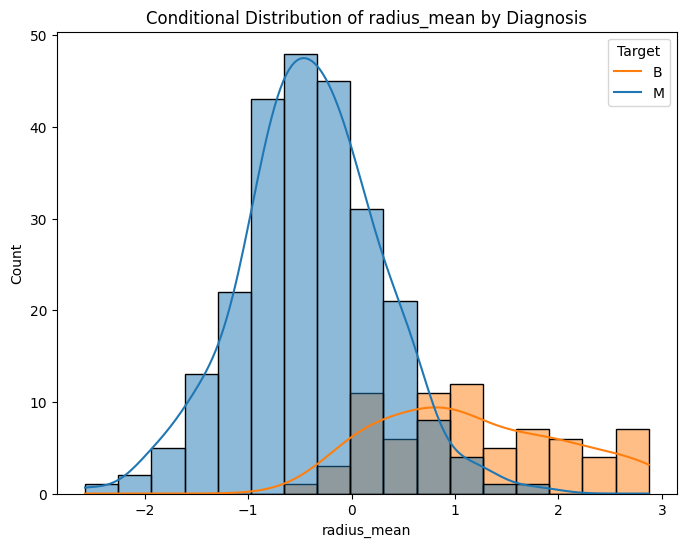

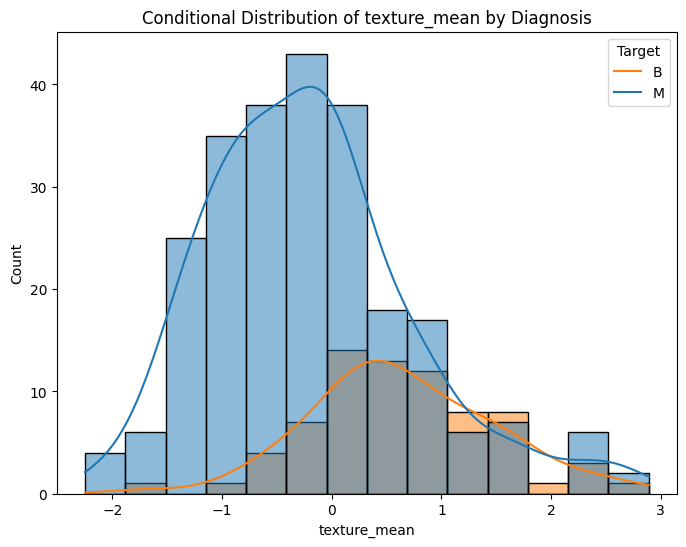

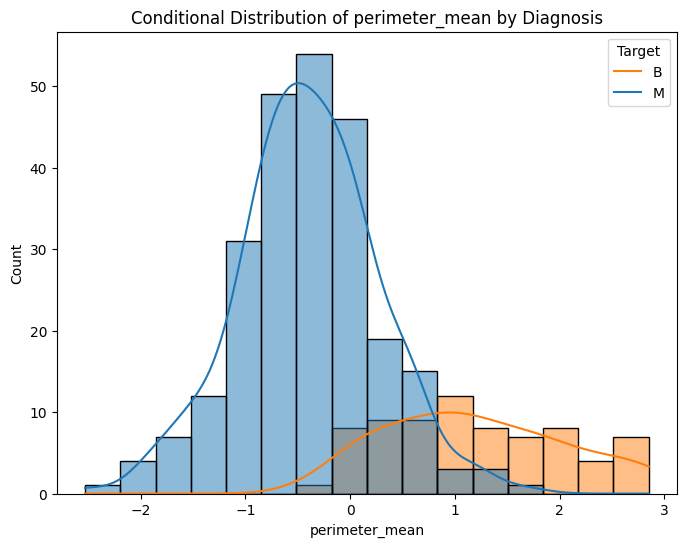

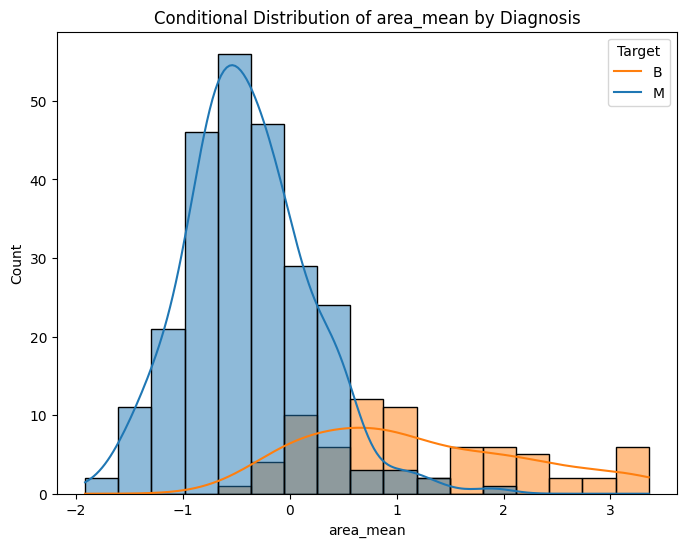

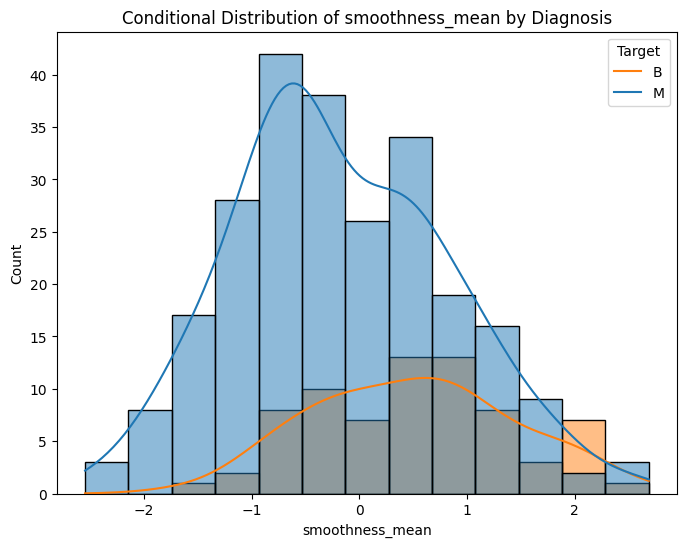

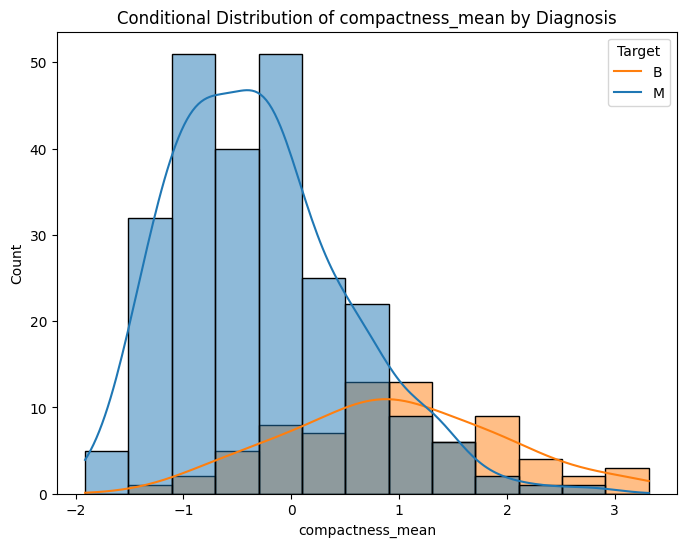

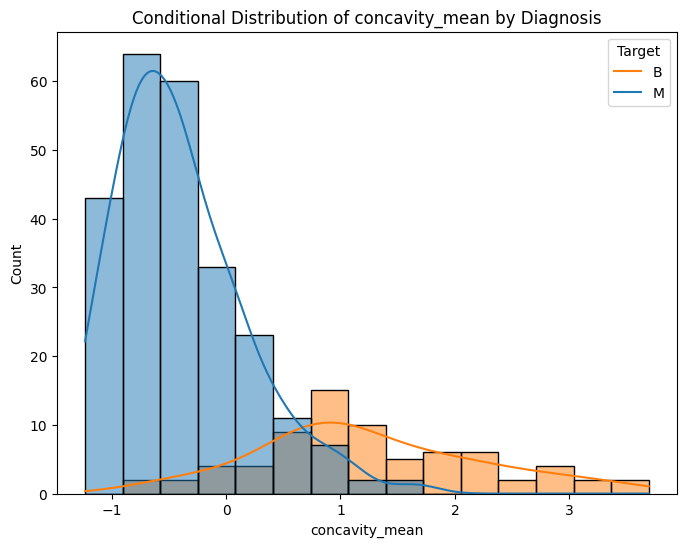

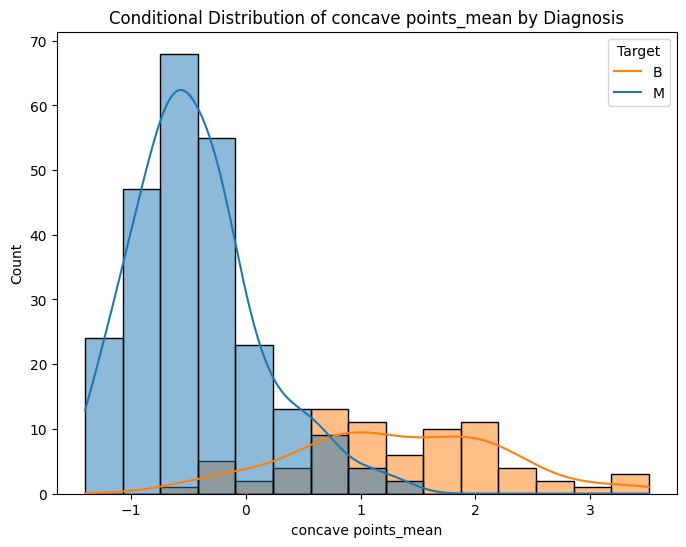

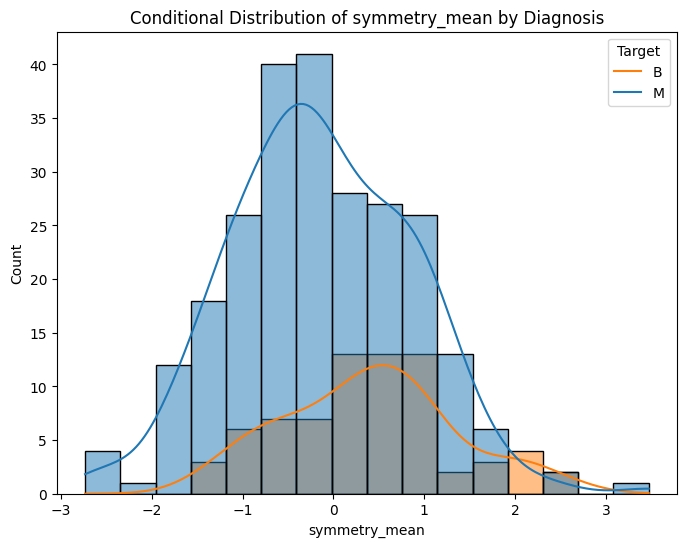

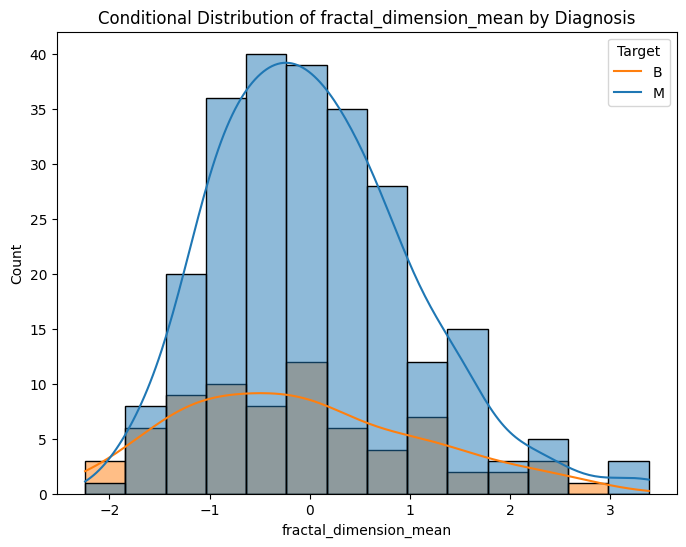

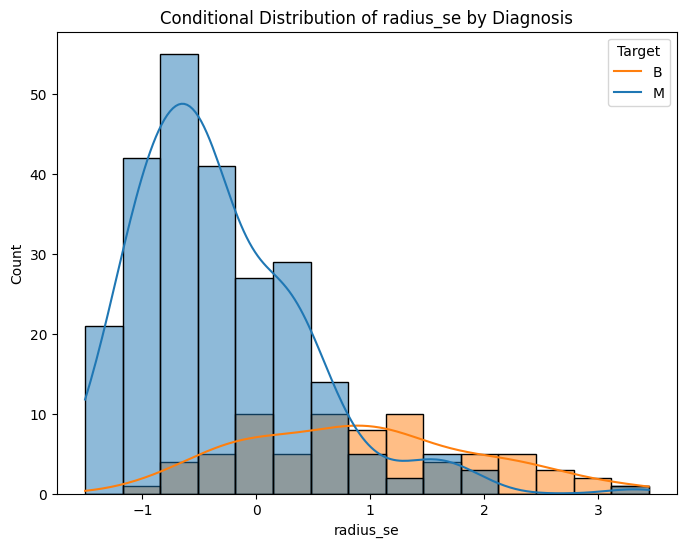

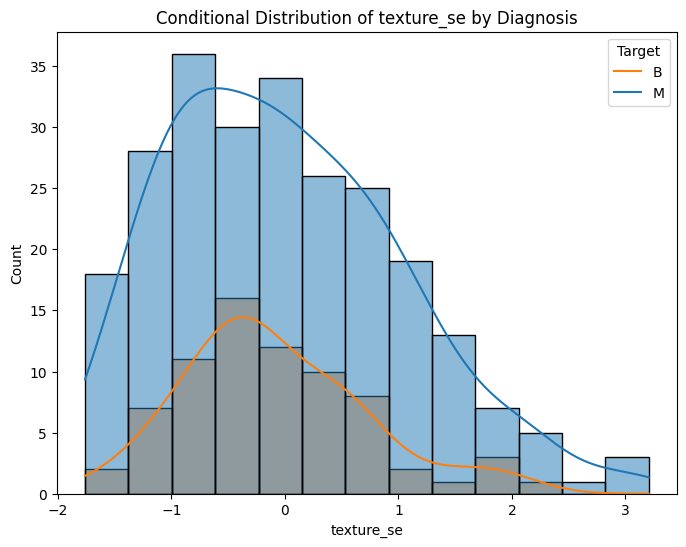

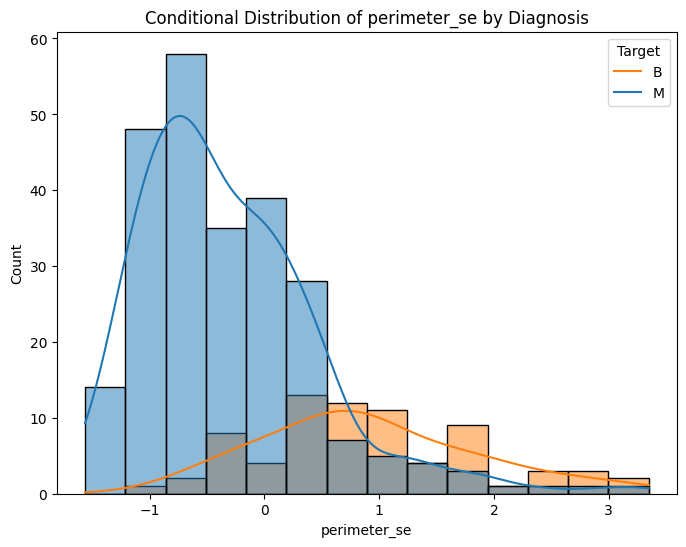

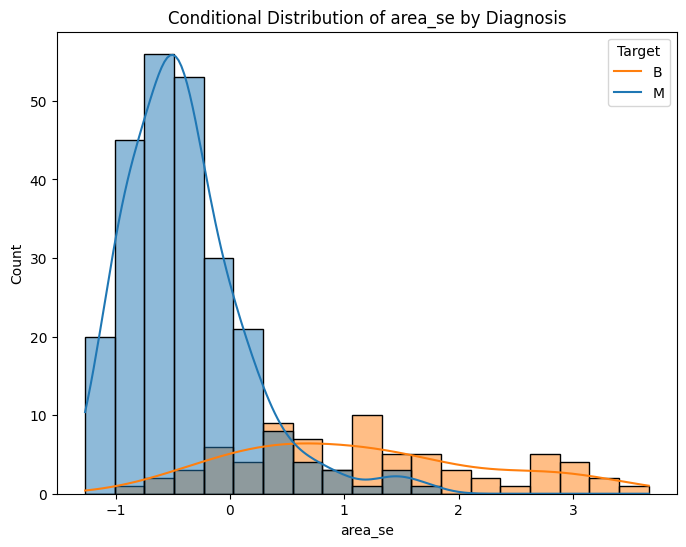

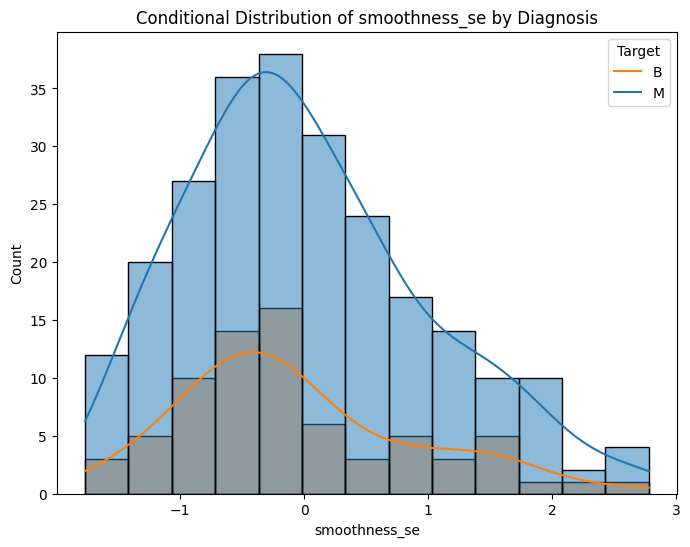

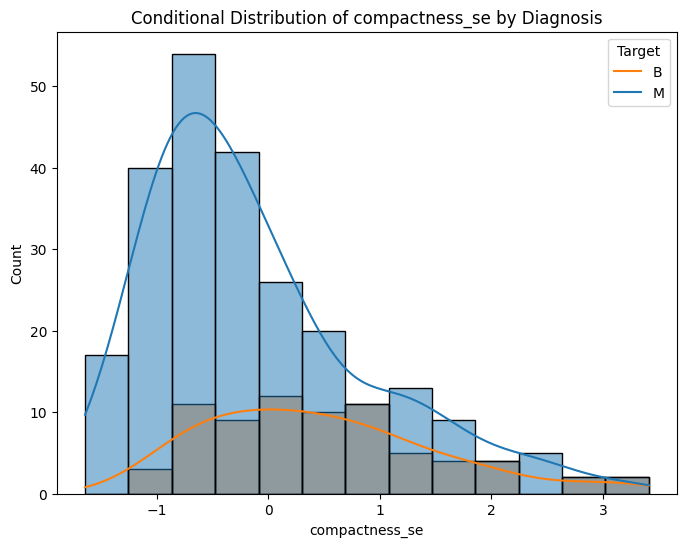

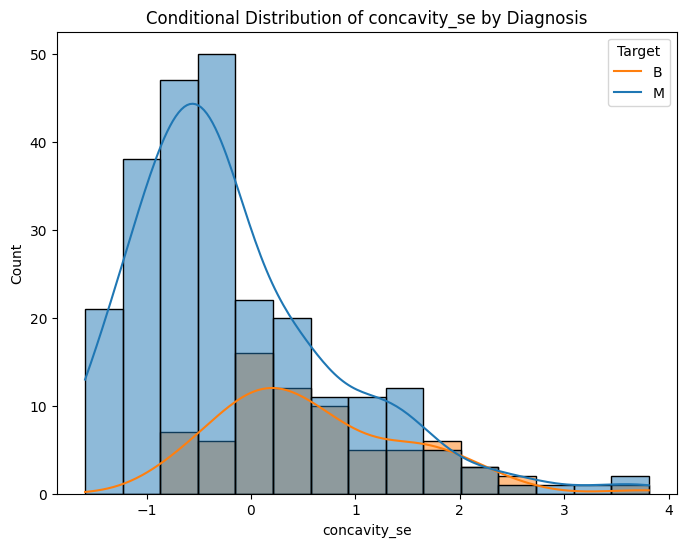

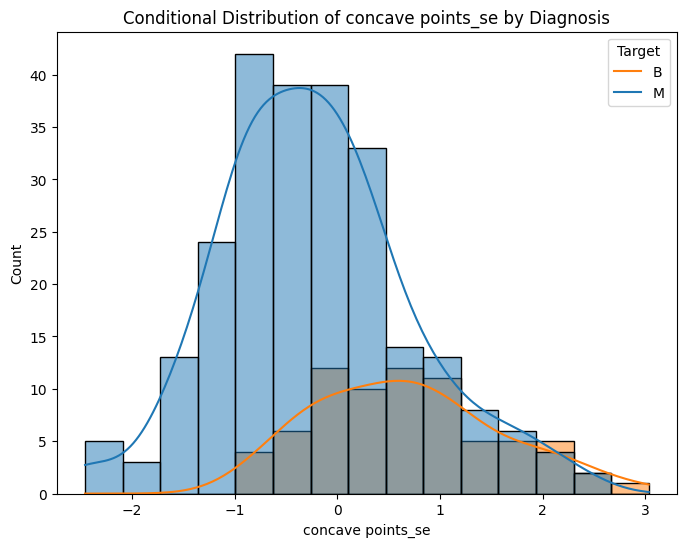

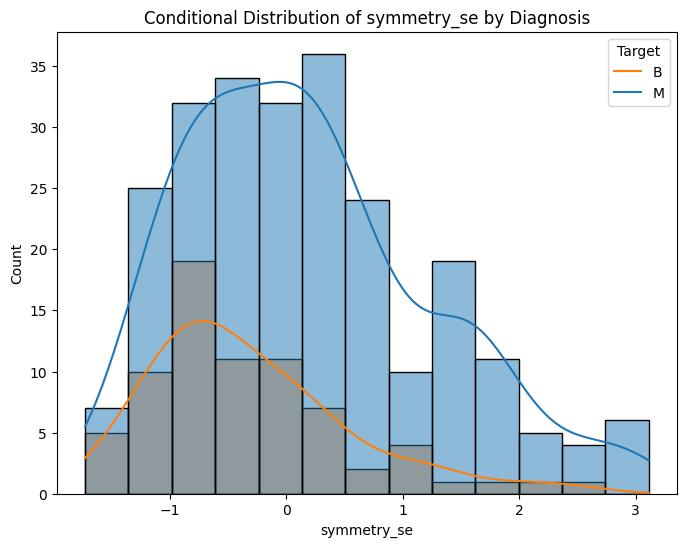

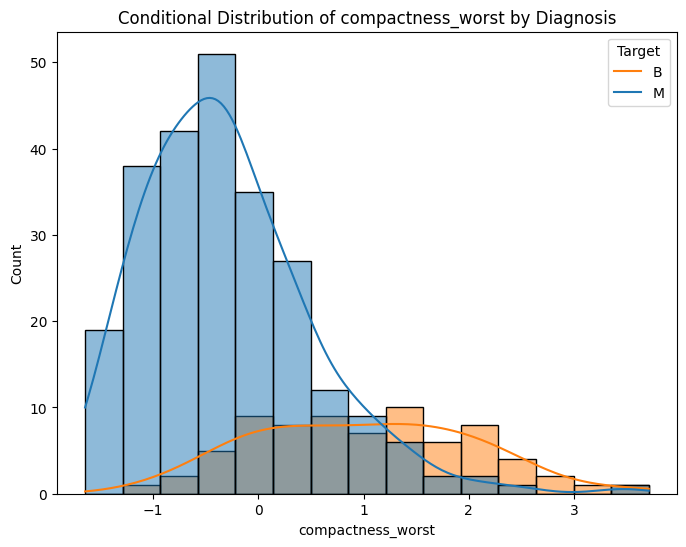

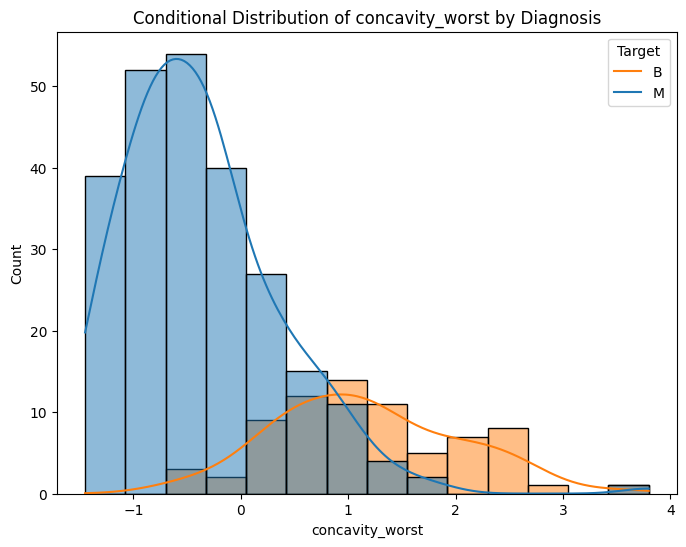

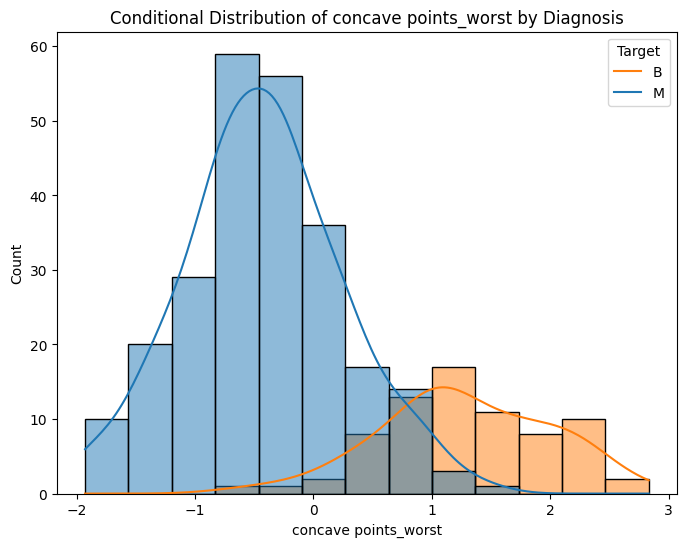

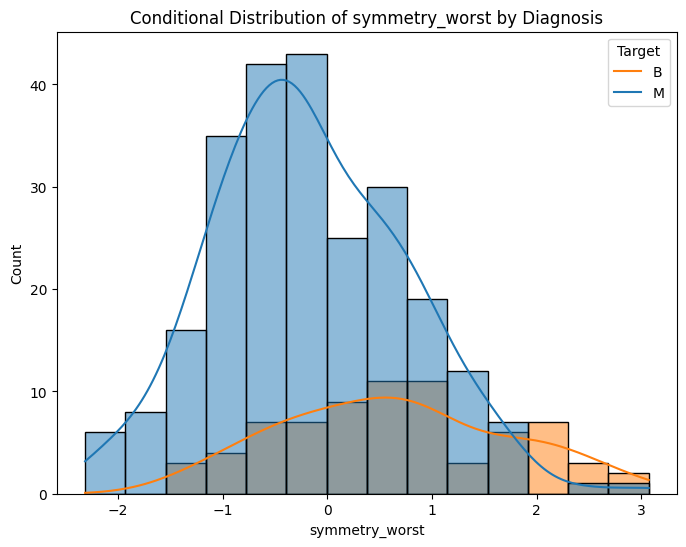

In [ ]:
for feature in x_train.columns:
    plt.figure(figsize=(8,6))
    sns.histplot(data=x_train,x=feature,hue=y_train,kde=True)
    plt.title(f'Conditional Distribution of {feature} by Diagnosis')
    plt.legend(title='Target',labels=['B','M'])
    plt.show()

In [ ]:
df_indp=df_clas[['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean']]
df_indp.head()

diagnosis  radius_mean  texture_mean  smoothness_mean  compactness_mean  \
6           1        18.25         19.98          0.09463           0.10900   
7           1        13.71         20.83          0.11890           0.16450   
10          1        16.02         23.24          0.08206           0.06669   
11          1        15.78         17.89          0.09710           0.12920   
13          1        15.85         23.95          0.08401           0.10020   

    symmetry_mean  fractal_dimension_mean  
6          0.1794                 0.05742  
7          0.2196                 0.07451  
10         0.1528                 0.05697  
11         0.1842                 0.06082  
13         0.1847                 0.05338

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df_indp.iloc[:,:].corr(),annot=True,fmt='.0%')

<Axes: >

## Calculate P(Y=y) for all possible y

In [ ]:
def calculate_prior(df, Y):
    classes = sorted(list(df[Y].unique()))#getting unique values of y which is the diagnosis in our case its two values only{0,1}
    prior = []
    for i in classes:#iterating over each class and finding its probability 'prior'
        prior.append(len(df[df[Y]==i])/len(df))
    return prior

## Convert continuous features to Categorical features

In [ ]:
df_indp["cat_mean_radius"] = pd.cut(df_indp["radius_mean"].values, bins = 5, labels = [0,1,2,3,4])
df_indp["cat_mean_texture"] = pd.cut(df_indp["texture_mean"].values, bins = 5, labels = [0,1,2,3,4])
df_indp["cat_mean_smoothness"] = pd.cut(df_indp["smoothness_mean"].values, bins = 5, labels = [0,1,2,3,4])
df_indp["cat_mean_compactness"] = pd.cut(df_indp["compactness_mean"].values, bins = 5, labels = [0,1,2,3,4])
df_indp["cat_mean_symmetry"] = pd.cut(df_indp["symmetry_mean"].values, bins = 5, labels = [0,1,2,3,4])
df_indp["cat_mean_fractal_dimension"] = pd.cut(df_indp["fractal_dimension_mean"].values, bins = 5, labels = [0,1,2,3,4])
#converting continous features to categorical features then removing the columns of the continous features from our dataframe
data = df_indp.drop(columns=['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean'])
data = data[["cat_mean_radius",	"cat_mean_texture",	"cat_mean_smoothness","cat_mean_compactness","cat_mean_symmetry","cat_mean_fractal_dimension", "diagnosis"]]
data.head(10)
# 'diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean'

<ipython-input-38-9a3746d7fbd8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_indp["cat_mean_radius"] = pd.cut(df_indp["radius_mean"].values, bins = 5, labels = [0,1,2,3,4])
<ipython-input-38-9a3746d7fbd8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_indp["cat_mean_texture"] = pd.cut(df_indp["texture_mean"].values, bins = 5, labels = [0,1,2,3,4])
<ipython-input-38-9a3746d7fbd8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

cat_mean_radius cat_mean_texture cat_mean_smoothness cat_mean_compactness  \
6                4                2                   2                    2   
7                2                2                   4                    3   
10               3                3                   1                    1   
11               3                2                   2                    3   
13               3                3                   1                    2   
16               2                2                   2                    1   
17               3                2                   4                    4   
19               2                1                   2                    1   
20               2                1                   3                    2   
21               0                0                   3                    1   

   cat_mean_symmetry cat_mean_fractal_dimension  diagnosis  
6                  2                          1          1  
7                  3                          4          1  
10                 1                          1          1  
11                 2                          1          1  
13                 2                          0          1  
16                 1                          1          1  
17                 3                          4          1  
19                 2                          1          0  
20                 3                          3          0  
21                 2                          3          0

## Calculate P(X=x|Y=y) categorically

In [ ]:
def calculate_likelihood_categorical(df, feat_name, feat_val, Y, label):
    feat = list(df.columns)
    #choosing rows which the label is the class we passed to the function in our case its either 0 or 1
    df = df[df[Y]==label]
    #calculating the conditional probability of feature given a certain value
    p_x_given_y = len(df[df[feat_name]==feat_val]) / len(df)
    return p_x_given_y

## Calculate P(X=x1|Y=y)P(X=x2|Y=y)...P(X=xn|Y=y) * P(Y=y) for all y and find the maximum

In [ ]:
def naive_bayes_categorical(df, X, Y):
    # get feature names
    features = list(df.columns)[:-1]

    # calculate prior
    prior = calculate_prior(df, Y)

    Y_pred = []
    # loop over every data sample
    for x in X:
        # calculate likelihood
        labels = sorted(list(df[Y].unique()))#[0,1]
        #intializing lilkelihood to be a list of ones [1,1]
        likelihood = [1]*len(labels)
        #loop over each class {0,1}
        for j in range(len(labels)):
          #{loop over each feature}
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_categorical(df, features[i], x[i], Y, labels[j])

        # calculate posterior probability (numerator only)
        post_prob = [1]*len(labels)
        #iterating over each class
        for j in range(len(labels)):
          #calculating posterior
            post_prob[j] = likelihood[j] * prior[j]
            #appending to y_predict max posterior probability
        Y_pred.append(np.argmax(post_prob))
    return np.array(Y_pred)

## Test Categorical model

In [ ]:
train, test = train_test_split(data, test_size=.2, random_state=42)

X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
Y_pred = naive_bayes_categorical(train, X=X_test, Y="diagnosis")

from sklearn.metrics import confusion_matrix, f1_score
print(f'The confusion matrix of our custom calssifier: {confusion_matrix(Y_test, Y_pred)}')
print(f'f1_score of our custom classifier : {f1_score(Y_test, Y_pred)}')
print(f'Accuracy of our custom classifier : {accuracy_score(Y_test, Y_pred)}')

The confusion matrix of our custom calssifier: [[52  3]
 [ 4 21]]
f1_score of our custom classifier : 0.8571428571428572
Accuracy of our custom classifier : 0.9125


## Test using python libraries

In [ ]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_indp.iloc[:,1:], df_indp.iloc[:,0], test_size=0.2, random_state=42)

# Create a Categorical Naive Bayes classifier
clf = CategoricalNB()

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"f1_score of the classifier using standard python package: {f1}")
print(f"Accuracy of the classifier using standard python package: {accuracy}")

f1_score of the classifier using standard python package: 0.8988095238095237
Accuracy of the classifier using standard python package: 0.9
